In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
master_data=pd.read_csv('C:\\Users\\PC\\Desktop\\Thesis\\database\\thesis_data\\master_data_cleaned.csv',index_col='Date')
master_data.index=pd.to_datetime(master_data.index)

In [3]:
#^HSI and ^GSPTSE: 0.006458556382781373
ratios=master_data['^HSI']/master_data['^GSPTSE']
train = ratios[:2791]
test = ratios[2791:]

In [4]:
# normalize both test and train data with respect to training data
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train.values.reshape(-1,1))
test_data=scaler.fit_transform(test.values.reshape(-1,1))

In [5]:
X_train=[]
y_train=[]

In [6]:
#60 days train 61 predict
for i in range(60,train_data.shape[0]):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i,0])

In [7]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [54]:
X_train.shape, y_train.shape

((2731, 60, 1), (2731,))

In [17]:
#Reshape the data into the shape accepted by the LSTM
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [23]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

2731/2731 [==============================] - 220s 81ms/sample - loss: 0.0026


In [41]:
#test data prep
X_test=[]
y_test=ratios.values[2791+60:]
for i in range(60,test_data.shape[0]):
    X_test.append(test_data[i-60:i])
    
    
X_test=np.array(X_test)

#Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [31]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

In [42]:
#get rmse
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.1834318463973802

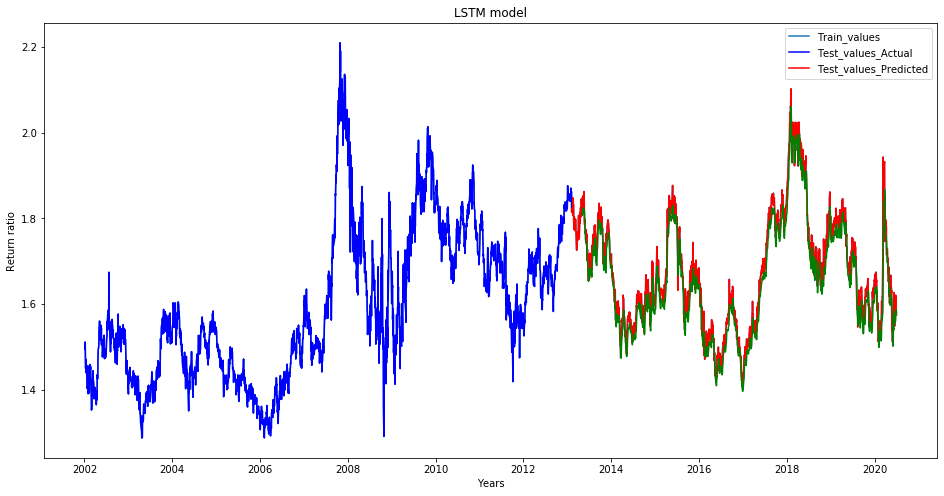

In [48]:
#visulaize model statistical performance
plt.figure(figsize=(16,8))
plt.plot(ratios)
plt.plot(train, color='blue')
plt.plot(test,color='red')
plt.plot(test[60:].index,predictions,color='green')
plt.title('LSTM model')
plt.xlabel('Years')
plt.ylabel('Return ratio')
plt.legend(['Train_values','Test_values_Actual','Test_values_Predicted'])
plt.show()

In [ ]:
#visulaize model's monetary performance


save model
from keras.models import load_model

    model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
    del model  # deletes the existing model

    # returns a compiled model
    # identical to the previous one
    model = load_model('my_model.h5')